<a href="https://colab.research.google.com/github/vtanoe08/Python_Vincent/blob/main/Copy_of_HDI_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install linearmodels;
#!pip install hvplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm
%matplotlib inline

     |████████████████████████████████| 1.5MB 4.7MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data=pd.read_csv('data_final_Project_Income_Class.csv')
data.head()

,year,Country,Country_Code,Income_Class,hdi,PSE,GDPG,DCPFS,POP,INOV,INTPINOV,INT
0,2000,Afghanistan,AFG,Low income,0.00,20.95758,0.000000,0.0,20779953.0,0.0,0.000000,0.000000
1,2001,Afghanistan,AFG,Low income,0.00,20.88291,0.000000,0.0,21606988.0,0.0,0.000000,0.004723
2,2002,Afghanistan,AFG,Low income,0.37,68.98685,0.000000,0.0,22600770.0,0.0,0.000000,0.004561
3,2003,Afghanistan,AFG,Low income,0.38,93.36218,3.868362,0.0,23680871.0,7.3,0.641606,0.087891
4,2004,Afghanistan,AFG,Low income,0.40,104.66382,-2.875184,0.0,24726684.0,5.8,0.613692,0.105809


In [ ]:
project=data.copy()
from sklearn.preprocessing import LabelEncoder
lb_make=LabelEncoder()
project['Income_Class']=lb_make.fit_transform(data['Income_Class'])
project.head()

,year,Country,Country_Code,Income_Class,hdi,PSE,GDPG,DCPFS,POP,INOV,INTPINOV,INT
0,2000,Afghanistan,AFG,1,0.00,20.95758,0.000000,0.0,20779953.0,0.0,0.000000,0.000000
1,2001,Afghanistan,AFG,1,0.00,20.88291,0.000000,0.0,21606988.0,0.0,0.000000,0.004723
2,2002,Afghanistan,AFG,1,0.37,68.98685,0.000000,0.0,22600770.0,0.0,0.000000,0.004561
3,2003,Afghanistan,AFG,1,0.38,93.36218,3.868362,0.0,23680871.0,7.3,0.641606,0.087891
4,2004,Afghanistan,AFG,1,0.40,104.66382,-2.875184,0.0,24726684.0,5.8,0.613692,0.105809


In [ ]:
High=project[(project['Income_Class']==0)|(project['Income_Class']==3)]
Low=project[(project['Income_Class']==1)|(project['Income_Class']==2)]

In [ ]:
data['PSE'].groupby(by=data['Income_Class']).describe().T.round(2)

Income_Class,High income,Low income,Lower middle income,Upper middle income
count,879.00,414.00,577.00,811.00
mean,88.57,84.67,85.92,89.95
std,35.88,45.21,39.41,38.87
min,0.00,0.00,0.00,0.00
25%,98.28,66.08,79.93,96.94
50%,101.27,94.05,101.12,103.25
75%,104.26,118.24,109.90,110.64
max,127.60,149.96,131.94,150.79


In [ ]:
data.groupby(by=data['Income_Class']).describe().T.round(2)

Income_Class  High income  Low income  Lower middle income  Upper middle income
year count         879.00      414.00               577.00               811.00
     mean         2008.51     2008.50              2008.49              2008.51
     std             5.18        5.19                 5.20                 5.20
     min          2000.00     2000.00              2000.00              2000.00
     25%          2004.00     2004.00              2004.00              2004.00
...                   ...         ...                  ...                  ...
INT  min             0.00        0.00                 0.00                 0.00
     25%            36.07        0.37                 1.80                 6.45
     50%            62.31        1.56                 6.49                21.50
     75%            78.72        5.27                16.70                41.96
     max           100.00       34.00                64.19                81.76

[72 rows x 4 columns]

In [ ]:
project['GDPG'].groupby(by=project['Income_Class']).describe().T.round(2)

Income_Class,0,1,2,3
count,879.00,414.00,577.00,811.00
mean,1.56,2.00,3.27,3.12
std,3.75,4.99,4.95,7.33
min,-15.15,-36.20,-27.23,-62.38
25%,-0.04,0.00,0.90,0.70
50%,1.68,2.04,3.00,2.85
75%,3.40,4.22,5.20,5.34
max,23.99,28.68,59.90,121.78


In [ ]:
#convert year to datetime
project['year']=pd.to_datetime(project['year'],format='%Y')
project=project.set_index('year',append=True)
project.index=project.index.swaplevel(0,1)
print(project.head())

                  Country Country_Code  Income_Class  ...  INOV  INTPINOV       INT
year                                                  ...                          
2000-01-01 0  Afghanistan          AFG             1  ...   0.0  0.000000  0.000000
2001-01-01 1  Afghanistan          AFG             1  ...   0.0  0.000000  0.004723
2002-01-01 2  Afghanistan          AFG             1  ...   0.0  0.000000  0.004561
2003-01-01 3  Afghanistan          AFG             1  ...   7.3  0.641606  0.087891
2004-01-01 4  Afghanistan          AFG             1  ...   5.8  0.613692  0.105809

[5 rows x 11 columns]


In [ ]:
data['year']=pd.to_datetime(data['year'],format='%Y')
data=data.set_index('year',append=True)
data.index=data.index.swaplevel(0,1)
print(data.head())

                  Country Country_Code Income_Class  ...  INOV  INTPINOV       INT
year                                                 ...                          
2000-01-01 0  Afghanistan          AFG   Low income  ...   0.0  0.000000  0.000000
2001-01-01 1  Afghanistan          AFG   Low income  ...   0.0  0.000000  0.004723
2002-01-01 2  Afghanistan          AFG   Low income  ...   0.0  0.000000  0.004561
2003-01-01 3  Afghanistan          AFG   Low income  ...   7.3  0.641606  0.087891
2004-01-01 4  Afghanistan          AFG   Low income  ...   5.8  0.613692  0.105809

[5 rows x 11 columns]


In [ ]:
Low['year']=pd.to_datetime(Low['year'],format='%Y')
Low=Low.set_index('year',append=True)
Low.index=Low.index.swaplevel(0,1)
print(Low.head())

                  Country Country_Code  Income_Class  ...  INOV  INTPINOV       INT
year                                                  ...                          
2000-01-01 0  Afghanistan          AFG             1  ...   0.0  0.000000  0.000000
2001-01-01 1  Afghanistan          AFG             1  ...   0.0  0.000000  0.004723
2002-01-01 2  Afghanistan          AFG             1  ...   0.0  0.000000  0.004561
2003-01-01 3  Afghanistan          AFG             1  ...   7.3  0.641606  0.087891
2004-01-01 4  Afghanistan          AFG             1  ...   5.8  0.613692  0.105809

[5 rows x 11 columns]


In [ ]:
High['year']=pd.to_datetime(High['year'],format='%Y')
High=High.set_index('year',append=True)
High.index=High.index.swaplevel(0,1)
print(High.head())

               Country Country_Code  Income_Class  ...  INOV   INTPINOV       INT
year                                               ...                           
2000-01-01 18  Albania          ALB             3  ...   0.0   0.000000  0.114097
2001-01-01 19  Albania          ALB             3  ...   0.0   0.000000  0.325798
2002-01-01 20  Albania          ALB             3  ...   0.0   0.000000  0.390081
2003-01-01 21  Albania          ALB             3  ...  23.9  23.228420  0.971900
2004-01-01 22  Albania          ALB             3  ...  22.0  53.248532  2.420388

[5 rows x 11 columns]


In [ ]:
data.head()
X=data.iloc[:,[4,5,6,8,10]]
y=data.iloc[:,3:4]
X_high=High.iloc[:,[4,5,6,8,10]]
y_high=High.iloc[:,3:4]
X_low=Low.iloc[:,[4,5,6,8,10]]
y_low=Low.iloc[:,3:4]

In [ ]:
print(X.head(3))
print('-------------------')
print(y.head(3))

                   PSE  GDPG  DCPFS  INOV       INT
year                                               
2000-01-01 0  20.95758   0.0    0.0   0.0  0.000000
2001-01-01 1  20.88291   0.0    0.0   0.0  0.004723
2002-01-01 2  68.98685   0.0    0.0   0.0  0.004561
-------------------
               hdi
year              
2000-01-01 0  0.00
2001-01-01 1  0.00
2002-01-01 2  0.37


In [ ]:
#create dummies variables
var=data.copy()
var_code=pd.get_dummies(var['Income_Class'])
var_new=pd.concat([var,var_code],axis=1)
var_new.head()

,,Country,Country_Code,Income_Class,hdi,PSE,GDPG,DCPFS,POP,INOV,INTPINOV,INT,High income,Low income,Lower middle income,Upper middle income
year,,,,,,,,,,,,,,,,
2000-01-01,0,Afghanistan,AFG,Low income,0.00,20.95758,0.000000,0.0,20779953.0,0.0,0.000000,0.000000,0,1,0,0
2001-01-01,1,Afghanistan,AFG,Low income,0.00,20.88291,0.000000,0.0,21606988.0,0.0,0.000000,0.004723,0,1,0,0
2002-01-01,2,Afghanistan,AFG,Low income,0.37,68.98685,0.000000,0.0,22600770.0,0.0,0.000000,0.004561,0,1,0,0
2003-01-01,3,Afghanistan,AFG,Low income,0.38,93.36218,3.868362,0.0,23680871.0,7.3,0.641606,0.087891,0,1,0,0
2004-01-01,4,Afghanistan,AFG,Low income,0.40,104.66382,-2.875184,0.0,24726684.0,5.8,0.613692,0.105809,0,1,0,0


In [ ]:
#Panels OLS for everything
mod = PanelOLS(y, X, entity_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    hdi   R-squared:                        0.5744
Estimator:                   PanelOLS   R-squared (Between):              0.4992
No. Observations:                2681   R-squared (Within):               0.5744
Date:                Fri, Jun 12 2020   R-squared (Overall):              0.5044
Time:                        01:00:08   Log-likelihood                    1937.7
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      717.37
Entities:                          18   P-value                           0.0000
Avg Obs:                       148.94   Distribution:                  F(5,2658)
Min Obs:                       148.00                                           
Max Obs:                       149.00   F-statistic (robust):             2339.1
                            

In [ ]:
#Panels OLS for Low
mod_low = PanelOLS(y_low, X_low, entity_effects=True)
res_low = mod_low.fit(cov_type='clustered', cluster_entity=True)
print(res_low)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    hdi   R-squared:                        0.2486
Estimator:                   PanelOLS   R-squared (Between):              0.3788
No. Observations:                 991   R-squared (Within):               0.2486
Date:                Fri, Nov 15 2019   R-squared (Overall):              0.3708
Time:                        20:59:58   Log-likelihood                    799.13
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      64.064
Entities:                          18   P-value                           0.0000
Avg Obs:                       55.056   Distribution:                   F(5,968)
Min Obs:                       55.000                                           
Max Obs:                       56.000   F-statistic (robust):             118.59
                            

In [ ]:
#Panels OLS for High
mod_high = PanelOLS(y_high, X_high, entity_effects=True)
res_high = mod_high.fit(cov_type='clustered', cluster_entity=True)
print(res_high)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    hdi   R-squared:                        0.4699
Estimator:                   PanelOLS   R-squared (Between):              0.3743
No. Observations:                1690   R-squared (Within):               0.4699
Date:                Fri, Nov 15 2019   R-squared (Overall):              0.3762
Time:                        20:59:59   Log-likelihood                    1904.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      295.48
Entities:                          18   P-value                           0.0000
Avg Obs:                       93.889   Distribution:                  F(5,1667)
Min Obs:                       92.000                                           
Max Obs:                       94.000   F-statistic (robust):             844.43
                            

In [ ]:
#Panels First Difference for everything
from linearmodels import BetweenOLS
mod_first = BetweenOLS(y, X)
res_first = mod_first.fit(cov_type='robust')
#res_first = mod_first.fit(cov_type='clustered', cluster_entity=True)
print(res_first)

                         BetweenOLS Estimation Summary                          
Dep. Variable:                    hdi   R-squared:                        0.9997
Estimator:                 BetweenOLS   R-squared (Between):              0.9997
No. Observations:                  18   R-squared (Within):              -0.9627
Date:                Fri, Nov 15 2019   R-squared (Overall):              0.8677
Time:                        21:00:00   Log-likelihood                    54.903
Cov. Estimator:                Robust                                           
                                        F-statistic:                      8896.6
Entities:                          18   P-value                           0.0000
Avg Obs:                       148.94   Distribution:                    F(5,13)
Min Obs:                       148.00                                           
Max Obs:                       149.00   F-statistic (robust):          1.012e+04
                            

In [ ]:
#Panels First Difference for Low
from linearmodels import BetweenOLS
mod_f_low = BetweenOLS(y_low, X_low)
res_f_low = mod_f_low.fit(cov_type='robust')
print(res_f_low)

                         BetweenOLS Estimation Summary                          
Dep. Variable:                    hdi   R-squared:                        0.9991
Estimator:                 BetweenOLS   R-squared (Between):              0.9991
No. Observations:                  18   R-squared (Within):              -1.7163
Date:                Fri, Nov 15 2019   R-squared (Overall):              0.8346
Time:                        21:00:02   Log-likelihood                    50.761
Cov. Estimator:                Robust                                           
                                        F-statistic:                      3008.8
Entities:                          18   P-value                           0.0000
Avg Obs:                       55.056   Distribution:                    F(5,13)
Min Obs:                       55.000                                           
Max Obs:                       56.000   F-statistic (robust):             4878.6
                            

In [ ]:
#Panels First Difference for High
mod_f_high = BetweenOLS(y_high, X_high)
res_f_high = mod_f_high.fit(cov_type='robust')
print(res_f_high)

                         BetweenOLS Estimation Summary                          
Dep. Variable:                    hdi   R-squared:                        0.9996
Estimator:                 BetweenOLS   R-squared (Between):              0.9996
No. Observations:                  18   R-squared (Within):              -4.9745
Date:                Fri, Nov 15 2019   R-squared (Overall):              0.8867
Time:                        21:00:03   Log-likelihood                    48.970
Cov. Estimator:                Robust                                           
                                        F-statistic:                      6166.8
Entities:                          18   P-value                           0.0000
Avg Obs:                       93.889   Distribution:                    F(5,13)
Min Obs:                       92.000                                           
Max Obs:                       94.000   F-statistic (robust):             8255.5
                            

In [ ]:
#random effects for high
mod_f_highr = RandomEffects(y_high, X_high)
res_f_highr = mod_f_highr.fit(cov_type='robust')
print(res_f_highr)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    hdi   R-squared:                        0.7323
Estimator:              RandomEffects   R-squared (Between):              0.9011
No. Observations:                1690   R-squared (Within):              -0.9231
Date:                Fri, Nov 15 2019   R-squared (Overall):              0.8667
Time:                        21:00:04   Log-likelihood                    470.22
Cov. Estimator:                Robust                                           
                                        F-statistic:                      921.66
Entities:                          18   P-value                           0.0000
Avg Obs:                       93.889   Distribution:                  F(5,1685)
Min Obs:                       92.000                                           
Max Obs:                       94.000   F-statistic (robust):             1956.4
                            

In [ ]:
#random effects for low
mod_f_lowr = RandomEffects(y_low, X_low)
res_f_lowr = mod_f_lowr.fit(cov_type='robust')
print(res_f_lowr)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    hdi   R-squared:                        0.8327
Estimator:              RandomEffects   R-squared (Between):              0.9770
No. Observations:                 991   R-squared (Within):              -0.8507
Date:                Fri, Nov 15 2019   R-squared (Overall):              0.8662
Time:                        21:00:06   Log-likelihood                    285.22
Cov. Estimator:                Robust                                           
                                        F-statistic:                      981.72
Entities:                          18   P-value                           0.0000
Avg Obs:                       55.056   Distribution:                   F(5,986)
Min Obs:                       55.000                                           
Max Obs:                       56.000   F-statistic (robust):             1665.6
                            

In [ ]:
#random effects for everything
mod_f_all = RandomEffects(y, X)
res_f_all = mod_f_all.fit(cov_type='robust')
print(res_f_all)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    hdi   R-squared:                        0.8407
Estimator:              RandomEffects   R-squared (Between):              0.9667
No. Observations:                2681   R-squared (Within):              -0.0573
Date:                Fri, Nov 15 2019   R-squared (Overall):              0.8978
Time:                        21:00:07   Log-likelihood                    446.83
Cov. Estimator:                Robust                                           
                                        F-statistic:                      2823.5
Entities:                          18   P-value                           0.0000
Avg Obs:                       148.94   Distribution:                  F(5,2676)
Min Obs:                       148.00                                           
Max Obs:                       149.00   F-statistic (robust):             6904.4
                            

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
ylow=Low.iloc[:,2:3]
ylow.head()

,,Income_Class
year,,
2000-01-01,0,1
2001-01-01,1,1
2002-01-01,2,1
2003-01-01,3,1
2004-01-01,4,1


In [ ]:
## KNN classifier
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X_low, ylow, test_size = 0.20)
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(leaf_size=50, metric='minkowski',n_neighbors=6)  
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
Y_pred = classifier.predict(X_test)
scores = model_selection.cross_val_score(classifier, X_low, ylow, cv=10)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[ 68  11]
 [ 20 100]]
              precision    recall  f1-score   support

           1       0.77      0.86      0.81        79
           2       0.90      0.83      0.87       120

    accuracy                           0.84       199
   macro avg       0.84      0.85      0.84       199
weighted avg       0.85      0.84      0.85       199



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when

In [ ]:
scores

array([0.66      , 0.62      , 0.7       , 0.78      , 0.70707071,
       0.67676768, 0.6969697 , 0.62244898, 0.81632653, 0.65306122])

In [ ]:
avg = np.mean(scores)
avg

0.6932644815501958

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 68  11]
 [ 20 100]]


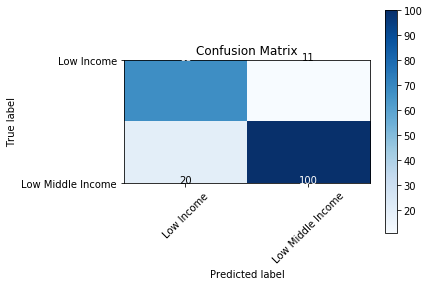

In [ ]:
# Plot non-normalized confusion matrix
cmatrix = confusion_matrix(Y_test,Y_pred)
#print(cmatrix)
plot_confusion_matrix(cmatrix, classes=['Low Income','Low Middle Income'])

In [ ]:
data.DCPFS.groupby(by=data.Income_Class).describe().round().T

Income_Class,High income,Low income,Lower middle income,Upper middle income
count,879.0,414.0,577.0,811.0
mean,98.0,24.0,36.0,46.0
std,68.0,26.0,25.0,38.0
min,-10.0,-5.0,-17.0,-115.0
25%,47.0,10.0,16.0,23.0
50%,90.0,18.0,35.0,41.0
75%,145.0,26.0,54.0,63.0
max,317.0,150.0,113.0,217.0
